In [45]:
import matplotlib.pyplot as plt
from Graph import Graph
from Queue import Queue
from heuristic_func import *
from searching_algorithms import Astar, DFS
from maze_preprocess import Node
from copy import deepcopy

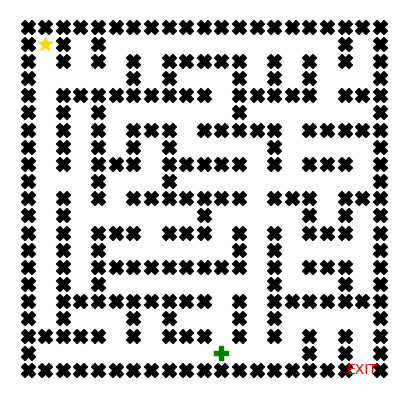

Starting point (x, y) = (1, 1)
Ending point (x, y) = (20, 19)
Bonus point at position (x, y) = (19, 11) with point -7


In [56]:
g = Graph('testcases/bonus2.txt')
fs = (5, 5)
g.visualize(figsize=fs)

Với trường hợp có điểm thưởng:
- Xây dựng một đồ thị mới chỉ gồm các điểm thưởng và START, END.
- Tất cả các đỉnh được nối với nhau (đồ thị đủ).
- Trọng số nối giữa các cạnh là khoảng cách heuristic giữa 2 đỉnh đó + số điểm thưởng.
- Tìm đường đi ngắn nhất từ START -> END trên đồ thị này.
- Với danh sách đường đi tìm được, tìm đường đi ngắn nhất thực tế trên mỗi chặng.

In [57]:
def make_routing_graph(g: Graph, hf):
    # Khởi tạo một đồ thị rỗng
    routing = Graph(None)
    start = g.start 
    end = g.end
    
    routing.start = start 
    routing.end = end 
    # Danh sách các node của đồ thị định hướng
    node_list = {
        start: Node(start),
        end: Node(end)
    }
    # Nối start và end
    node_list[start].neighbors.append({
        'coord': end, 
        'cost': hf(end, start)
    })
    
    # Danh sách các đỉnh tương ứng với từng điểm thưởng
    bonus_nodes = []
    bonus_values = {}
    
    # Với mỗi điểm thưởng 
    for bonus in g.bonus_points:
        new_coord = (bonus[0], bonus[1])
        new_cost = bonus[2]
        bonus_values[new_coord] = new_cost
        
        # Tạo một đỉnh tương ứng với tọa độ của nó
        new_node = Node(new_coord)
        # Kết nối đỉnh này với tất cả các đỉnh đang có của đồ thị
        for i, old_node in enumerate(bonus_nodes):
            distance = hf(old_node.coord, new_coord)
            new_old_cost = distance + bonus_values[old_node.coord]
            old_new_cost = distance + new_cost
            
            if new_old_cost < 0:
                new_old_cost = 0
            if old_new_cost < 0:
                old_new_cost = 0
            
            # Nối đỉnh này với đỉnh đang có
            new_node.neighbors.append({
                'coord': old_node.coord, 
                'cost': new_old_cost
            })
            # Nối đỉnh đang có với đỉnh này
            bonus_nodes[i].neighbors.append({
                'coord': new_coord, 
                'cost': old_new_cost
            })
        # Nối đỉnh này với đỉnh end
        new_node.neighbors.append({
            'coord': end, 
            'cost': hf(end, new_coord)
        })
        bonus_nodes.append(new_node)
    
    # Kết nối đỉnh start với tất cả các đỉnh thưởng
    # Thêm các đỉnh thưởng vào đồ thị định hướng
    for bonus_node in bonus_nodes:
        node_list[start].neighbors.append({
            'coord': bonus_node.coord, 
            'cost': hf(bonus_node.coord, start) + bonus_values[bonus_node.coord]
        })
        
        node_list[bonus_node.coord] = bonus_node
    
    routing.node_list = node_list
    return routing

In [58]:
rg = make_routing_graph(g, manhattan_heuristic)

In [59]:
rg.node_list

{(1,
  1): <Node coord=(1, 1) prev=None neighbors=[{'coord': (20, 19), 'cost': 37.0}, {'coord': (19, 11), 'cost': 21.0}]>,
 (20, 19): <Node coord=(20, 19) prev=None neighbors=[]>,
 (19,
  11): <Node coord=(19, 11) prev=None neighbors=[{'coord': (20, 19), 'cost': 9.0}]>}

In [60]:
Astar(rg, manhattan_heuristic)

True

In [61]:
path, cost = rg.get_path()

In [62]:
path

[(1, 1), (19, 11), (20, 19)]